In [ ]:
import pandas as pd
import numpy as np
import xgboost
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/telecom churn project/churn_geekl.csv', header=None)
dataset = data.values
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
2,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
3,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
4,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.


In [ ]:
data.isnull().any().any()

False

<Axes: >

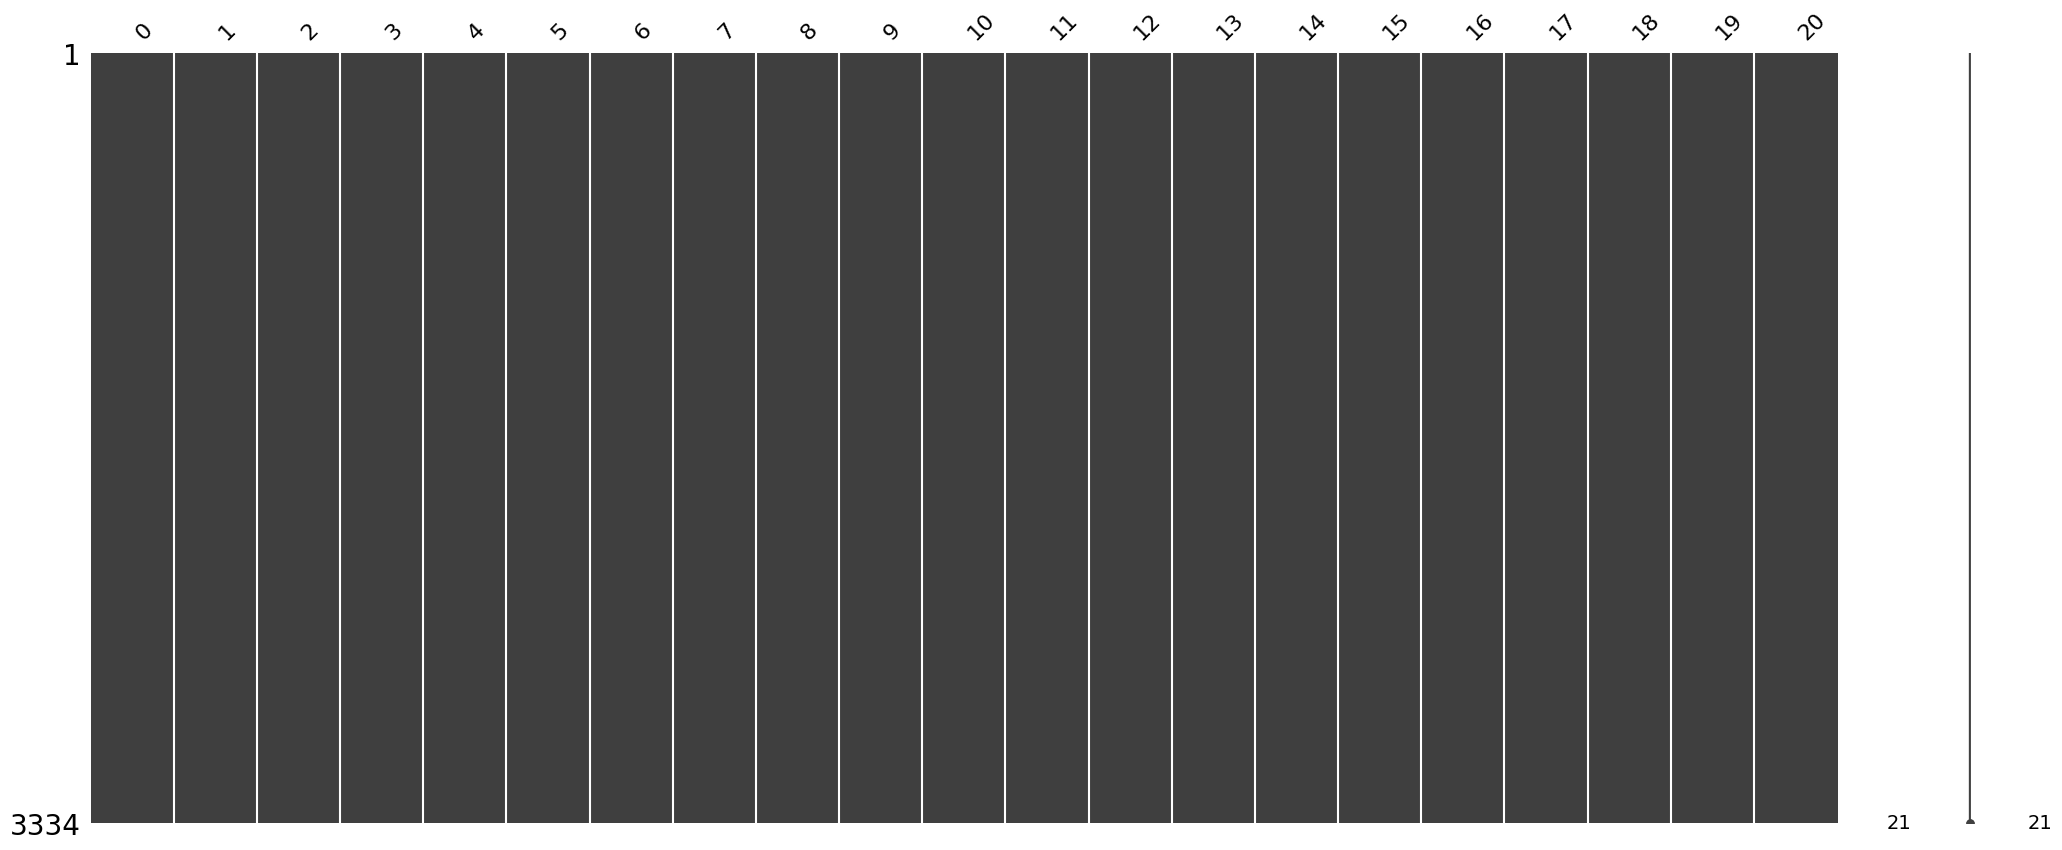

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.columns = data.iloc[0]
data=data.drop(data.index[0])

In [ ]:
col_names=data.columns.tolist()
col_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [ ]:
data.rename(columns={ 'Account Length':'Account_Length',
                     'Area Code':'Area_Code',
                     "Int'l Plan":'Intl_Plan',
                      'VMail Plan':'VMail_Plan',
                       'VMail Message':'VMail_Message',
                       'Day Mins':'Day_Mins',
                       'Day Calls':'Day_Calls',
                       'Day Charge':'Day_Charge',
                       'Eve Mins':'Eve_Mins',
                      'Eve Calls': 'Eve_Calls',
                      'Eve Charge':'Eve_Charge',
                      'Night Mins':'Night_Mins',
                      'Night Calls':'Night_Calls',
                     'Night Charge':'Night_Charge',
                     'Intl Mins':'Intl_Mins',
                      'Intl Calls':'Intl_Calls',
                     'Intl Charge':'Intl_Charge',
                     'CustServ Calls':'CustServ_Calls',
                     'Churn?':'Churn'},inplace=True)

In [ ]:
# Filter churned customers (Churn == "True.")
churned_customers = data[data['Churn'] == "True."]

# Filter non-churned customers (Churn == "False.")
non_churned_customers = data[data['Churn'] == "False."]

# Display churned customer count
print("Churned Customer Count:", len(churned_customers))

# Display non-churned customer count
print("Non-Churned Customer Count:", len(non_churned_customers))


Churned Customer Count: 483
Non-Churned Customer Count: 2850


In [ ]:
data['Day_Charge'] = pd.to_numeric(data['Day_Charge'], errors='coerce')
data['Eve_Charge'] = pd.to_numeric(data['Eve_Charge'], errors='coerce')
data['Night_Charge'] = pd.to_numeric(data['Night_Charge'], errors='coerce')

In [ ]:
# Convert 'Day_Calls' to numeric
data['Day_Calls'] = pd.to_numeric(data['Day_Calls'], errors='coerce')

# Convert 'Eve_Calls' to numeric
data['Eve_Calls'] = pd.to_numeric(data['Eve_Calls'], errors='coerce')

# Convert 'Night_Calls' to numeric
data['Night_Calls'] = pd.to_numeric(data['Night_Calls'], errors='coerce')


In [ ]:
# Now, you can calculate the new features
data['Total_Calls'] = data['Day_Calls'] + data['Eve_Calls'] + data['Night_Calls']
data['Total_Charges'] = data['Day_Charge'] + data['Eve_Charge'] + data['Night_Charge']

In [ ]:
data['Day_Mins'] = pd.to_numeric(data['Day_Mins'], errors='coerce')
data['Total_Calls'] = pd.to_numeric(data['Total_Calls'], errors='coerce')

In [ ]:
data['Avg_Call_Duration'] = data['Day_Mins'] / data['Total_Calls']

In [ ]:
data['Intl_Mins'] = pd.to_numeric(data['Intl_Mins'], errors='coerce')
data['Intl_Calls'] = pd.to_numeric(data['Intl_Calls'], errors='coerce')

In [ ]:
data['Avg_Intl_Call_Duration'] = data['Intl_Mins'] / data['Intl_Calls']

In [ ]:
# Calculate total international calls and average international call duration
data['Total_International_Calls'] = data['Intl_Calls']

In [ ]:
data.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Total_Calls,Total_Charges,Avg_Call_Duration,Avg_Intl_Call_Duration,Total_International_Calls
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,10.0,3,2.700000,1,False.,300,72.86,0.883667,3.333333,3
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,13.7,3,3.700000,1,False.,329,55.54,0.491185,4.566667,3
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,12.2,5,3.290000,0,False.,328,59.00,0.742073,2.440000,5
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,6.6,7,1.780000,2,False.,248,65.02,1.207258,0.942857,7
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,10.1,3,2.730000,3,False.,356,49.36,0.468258,3.366667,3


In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Specify the file path where you want to save the CSV file
output_csv_file = "output_dataset.csv"

In [ ]:
# Export the DataFrame to the CSV file
df.to_csv(output_csv_file, index=False)

In [ ]:
print('\n', data.Intl_Plan.value_counts())
print('\n', data.VMail_Plan.value_counts())
print('\n', data.Churn.value_counts())


 no     3010
yes     323
Name: Intl_Plan, dtype: int64

 no     2411
yes     922
Name: VMail_Plan, dtype: int64

 False.    2850
True.      483
Name: Churn, dtype: int64


In [ ]:
#converting to numeric
data.Intl_Plan = data.Intl_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.Intl_Plan.value_counts())

data.VMail_Plan = data.VMail_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.VMail_Plan.value_counts())

data.Churn = data.Churn.apply( lambda x: 1.0 * (x=='True.') )
print('\n', data.Churn.value_counts())


 0.0    3010
1.0     323
Name: Intl_Plan, dtype: int64

 0.0    2411
1.0     922
Name: VMail_Plan, dtype: int64

 0.0    2850
1.0     483
Name: Churn, dtype: int64


In [ ]:
data.describe()

,Intl_Plan,VMail_Plan,Day_Mins,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Churn,Total_Calls,Total_Charges,Avg_Call_Duration,Avg_Intl_Call_Duration,Total_International_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3315.000000,3333.000000
mean,0.096910,0.276628,179.775098,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,10.237294,4.479448,0.144914,300.657666,56.685173,0.605545,3.112385,4.479448
std,0.295879,0.447398,54.467389,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.791840,2.461214,0.352067,34.328232,10.487816,0.196985,2.260809,2.461214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,188.000000,19.980000,0.000000,0.216667,0.000000
25%,0.000000,0.000000,143.700000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,8.500000,3.000000,0.000000,278.000000,49.590000,0.469688,1.685714,3.000000
50%,0.000000,0.000000,179.400000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,10.300000,4.000000,0.000000,301.000000,56.630000,0.596141,2.460000,4.000000
75%,0.000000,1.000000,216.400000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,12.100000,6.000000,0.000000,324.000000,63.650000,0.732895,3.800000,6.000000
max,1.000000,1.000000,350.800000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,20.000000,1.000000,410.000000,92.560000,1.561058,18.200000,20.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [ ]:
df2 = pd.pivot_table(data, values='Churn', index=['CustServ_Calls'], aggfunc=[len,np.sum,np.mean])
df2['ix'] = df2.index.values
df2.columns = df2.columns.droplevel()
print(df2)

                 len    sum      mean ix
CustServ_Calls                          
0                697   92.0  0.131994  0
1               1181  122.0  0.103302  1
2                759   87.0  0.114625  2
3                429   44.0  0.102564  3
4                166   76.0  0.457831  4
5                 66   40.0  0.606061  5
6                 22   14.0  0.636364  6
7                  9    5.0  0.555556  7
8                  2    1.0  0.500000  8
9                  2    2.0  1.000000  9


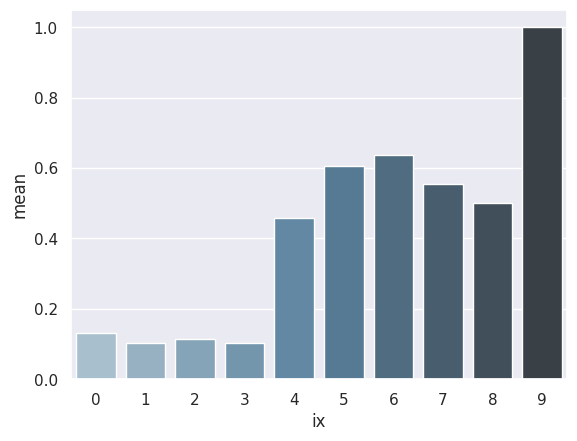

In [ ]:
sns.barplot(x="ix", y="mean", data=df2, palette="Blues_d", saturation=.5)
plt.show()

In [ ]:
# We don't need these columns
to_drop = ['State', 'Area_Code', 'Phone', 'Churn']
churn_feat_space = data.drop(to_drop, axis=1)


In [ ]:
# Pull out features for future use
features = churn_feat_space.columns
X = churn_feat_space.values.astype(np.float)

churn_result = data['Churn']
data['Churn'].value_counts()

<ipython-input-41-66df8ed1e660>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.values.astype(np.float)


0.0    2850
1.0     483
Name: Churn, dtype: int64

In [ ]:
print(churn_feat_space.columns)

Index(['Account_Length', 'Intl_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Total_Calls',
       'Total_Charges', 'Avg_Call_Duration', 'Avg_Intl_Call_Duration',
       'Total_International_Calls'],
      dtype='object', name=0)


In [ ]:
y = np.where(churn_result == 1,1,0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 22 features
Unique target labels: [0 1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [ ]:
def run_cv(X, y, clf_class, **kwargs):
    y_pred = y.copy()
    kf = KFold(n_splits=5, shuffle=True)

    # Iterate through folds
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]

        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred,clf

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean, median, or most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X_imputed = imputer.fit_transform(X)

# Now, you can train your RandomForestClassifier on the imputed data
rf, RF = run_cv(X_imputed, y, RandomForestClassifier)


In [ ]:
def accuracy(y_true, y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

In [ ]:
print("Random forest: {}%".format(100.0*accuracy(y, rf)))

Random forest: 97.14971497149715%


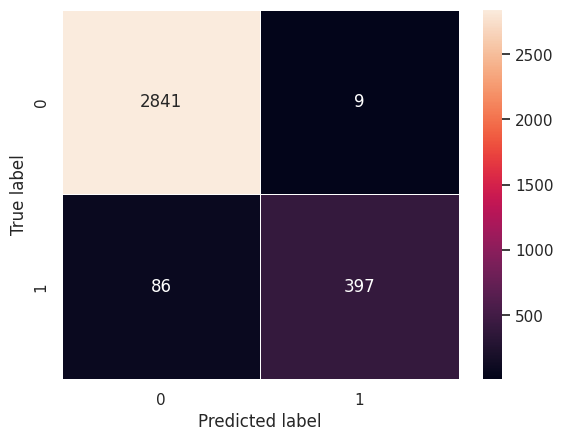

In [ ]:
sns.heatmap(confusion_matrix(y,rf,labels=[0,1]), annot=True, fmt="d", linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
pass

In [ ]:
RF.predict_proba(X[0:10])

array([[0.95, 0.05],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.8 , 0.2 ],
       [0.89, 0.11]])

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
xgbmodel=xgb.XGBClassifier()
xgbmodel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgbmodel=xgbmodel.fit(X_train,y_train)

In [ ]:
print("Training set accuracy :",xgbmodel.score(X_train,y_train)*100)
print("testing set accuracy :",xgbmodel.score(X_test,y_test)*100)

Training set accuracy : 100.0
testing set accuracy : 97.0


In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.001, 0.01, 0.1, 1, 10],
    'scale_pos_weight': [1, 1.5, 2, 2.5]
}

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100,
    scoring='accuracy', n_jobs=-1, cv=5, random_state=42
)

In [ ]:
# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000],
                                        'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.001, 0.01, 0.1, 1, 10],
                                        'scale_pos_weight': [1, 1.5, 2, 2.5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the best parameters and best accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

In [ ]:
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))

Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2.5, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Accuracy: 97.18%


In [ ]:
import lightgbm as lgb

In [ ]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
lgbmodel = lgb.LGBMClassifier()
lgbmodel = lgbmodel.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 320, number of negative: 1913
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 2233, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143305 -> initscore=-1.788107
[LightGBM] [Info] Start training from score -1.788107


In [ ]:
print("Training set accuracy:", lgbmodel.score(X_train, y_train) * 100)
print("Testing set accuracy:", lgbmodel.score(X_test, y_test) * 100)

Training set accuracy: 100.0
Testing set accuracy: 97.0


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
# Random Forest
rf_f1 = f1_score(y, rf)
rf_recall = recall_score(y, rf)
rf_precision = precision_score(y, rf)
rf_roc_auc = roc_auc_score(y, rf)

# XGBoost
xgb_f1 = f1_score(y, xgbmodel.predict(X))
xgb_recall = recall_score(y, xgbmodel.predict(X))
xgb_precision = precision_score(y, xgbmodel.predict(X))
xgb_roc_auc = roc_auc_score(y, xgbmodel.predict(X))

# LightGBM
lgb_f1 = f1_score(y, lgbmodel.predict(X))
lgb_recall = recall_score(y, lgbmodel.predict(X))
lgb_precision = precision_score(y, lgbmodel.predict(X))
lgb_roc_auc = roc_auc_score(y, lgbmodel.predict(X))


In [ ]:
# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'F1-Score': [rf_f1, xgb_f1, lgb_f1],
    'Recall': [rf_recall, xgb_recall, lgb_recall],
    'Precision': [rf_precision, xgb_precision, lgb_precision],
    'ROC-AUC': [rf_roc_auc, xgb_roc_auc, lgb_roc_auc]
})

# Display the summary table
print(summary_table)

           Model  F1-Score    Recall  Precision   ROC-AUC
0  Random Forest  0.893138  0.821946   0.977833  0.909394
1        XGBoost  0.965153  0.946170   0.984914  0.971857
2       LightGBM  0.965300  0.950311   0.980769  0.973576


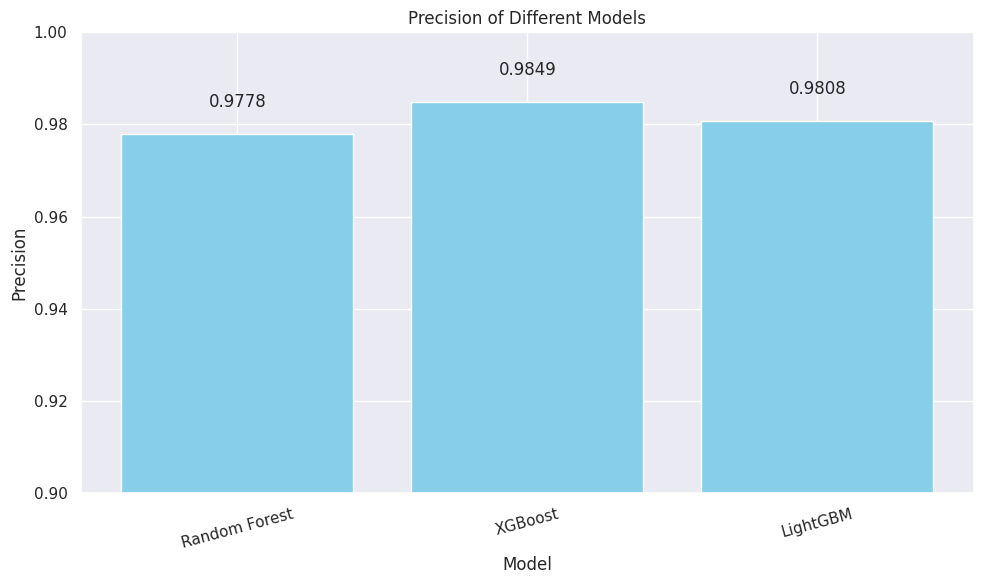

In [ ]:
# Model names and corresponding precision values
models = ['Random Forest', 'XGBoost', 'LightGBM']
precisions = [rf_precision, xgb_precision, lgb_precision]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='skyblue')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=15)  # Rotate x-axis labels for readability

# Add precision values on top of the bars
for i, precision in enumerate(precisions):
    plt.text(i, precision + 0.005, f'{precision:.4f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
import pickle

In [77]:
pickle.dump(xgb_model,open('model.pkl','wb'))

In [100]:
!pip install flask_ngrok

In [112]:
!pip install pyngrok==4.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=5cd794ab6c0369b2bf9aed2ed44964e97d1ce87ab529107569b898c074cff9b3
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 7.0.0
    Uninstalling pyngrok-7.0.0:
      Successfully uninstalled pyngrok-7.0.0


In [93]:
!ls

drive  model.pkl  output_dataset.csv  sample_data  save.pkl
